## Metro Interstate Traffic Volume

### Importing Libraries

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [5]:
#importing data
train_df = pd.read_csv("..\\notebooks\data\Metro_Interstate_Traffic_Volume.csv") 


## Data Description and stats

In [6]:
print('Dataset shape: ', train_df.shape)

Dataset shape:  (48204, 9)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [8]:
train_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [9]:
train_df.describe(include = 'all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [10]:
train_df.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

## DATA CLEANING

In [11]:
# convert the date_time column to datetime type
train_df['date_time'] = pd.to_datetime(train_df['date_time'])

In [12]:
train_df['time'] = train_df['date_time'].dt.hour

In [13]:
train_df['month'] = train_df['date_time'].dt.month

In [14]:
train_df['year'] = train_df['date_time'].dt.year

In [15]:
train_df['day'] = train_df['date_time'].dt.day_name()

In [16]:
train_df['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [17]:
z = lambda x: False if x == 'None' else True
train_df['holiday'] = train_df['holiday'].apply(z)

d:\MetroTrafficVolume\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


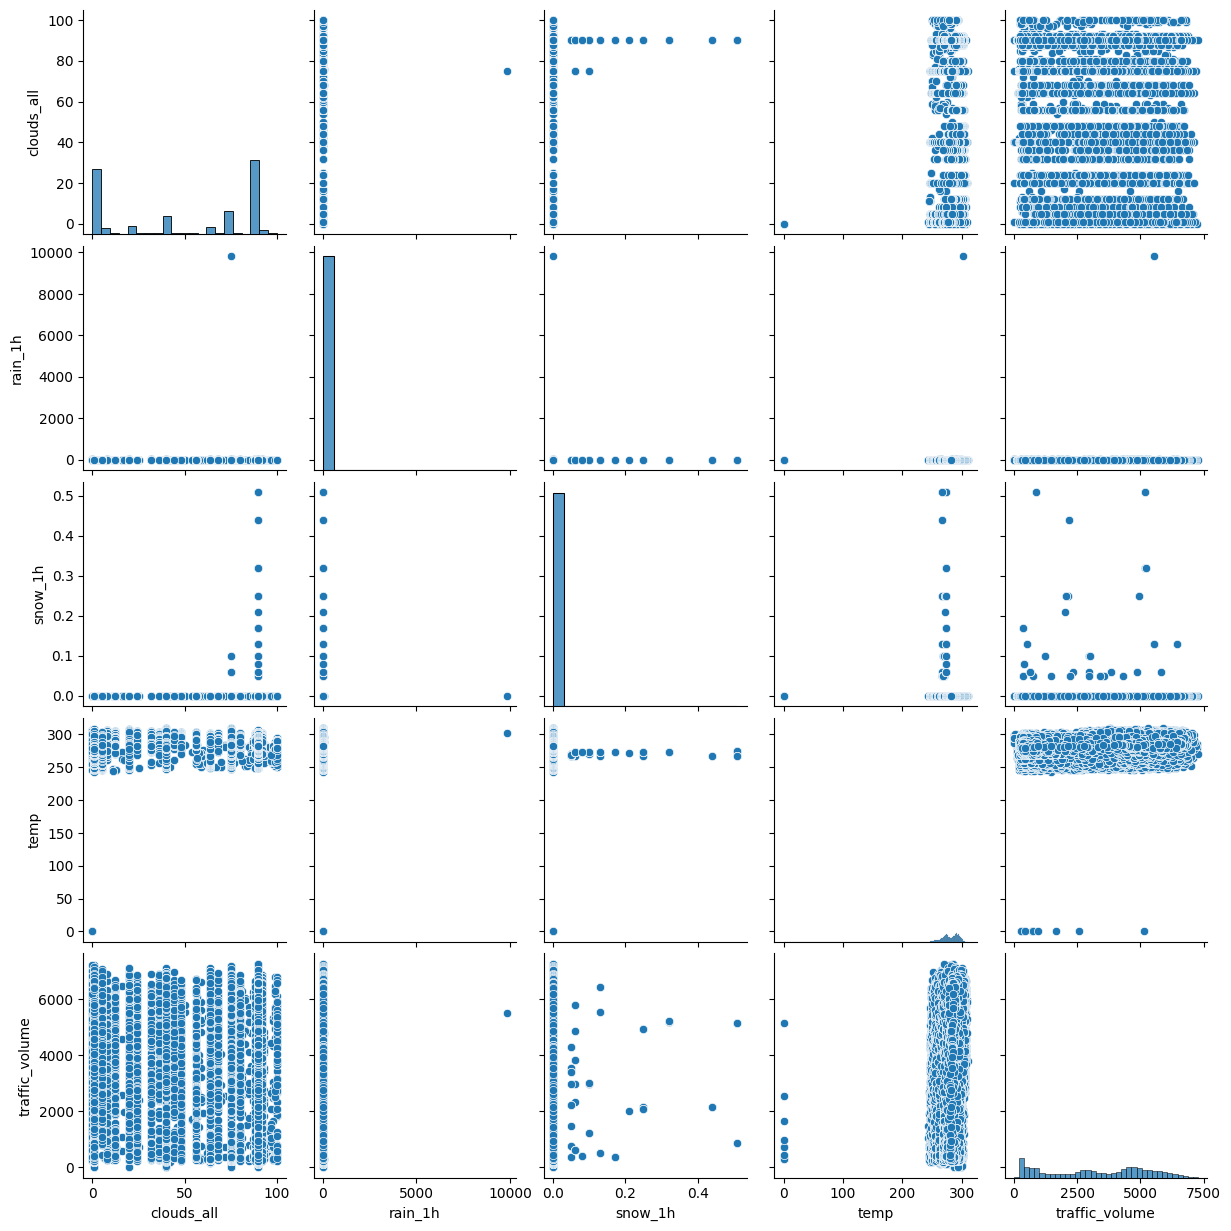

In [18]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(train_df[cols])
plt.show()

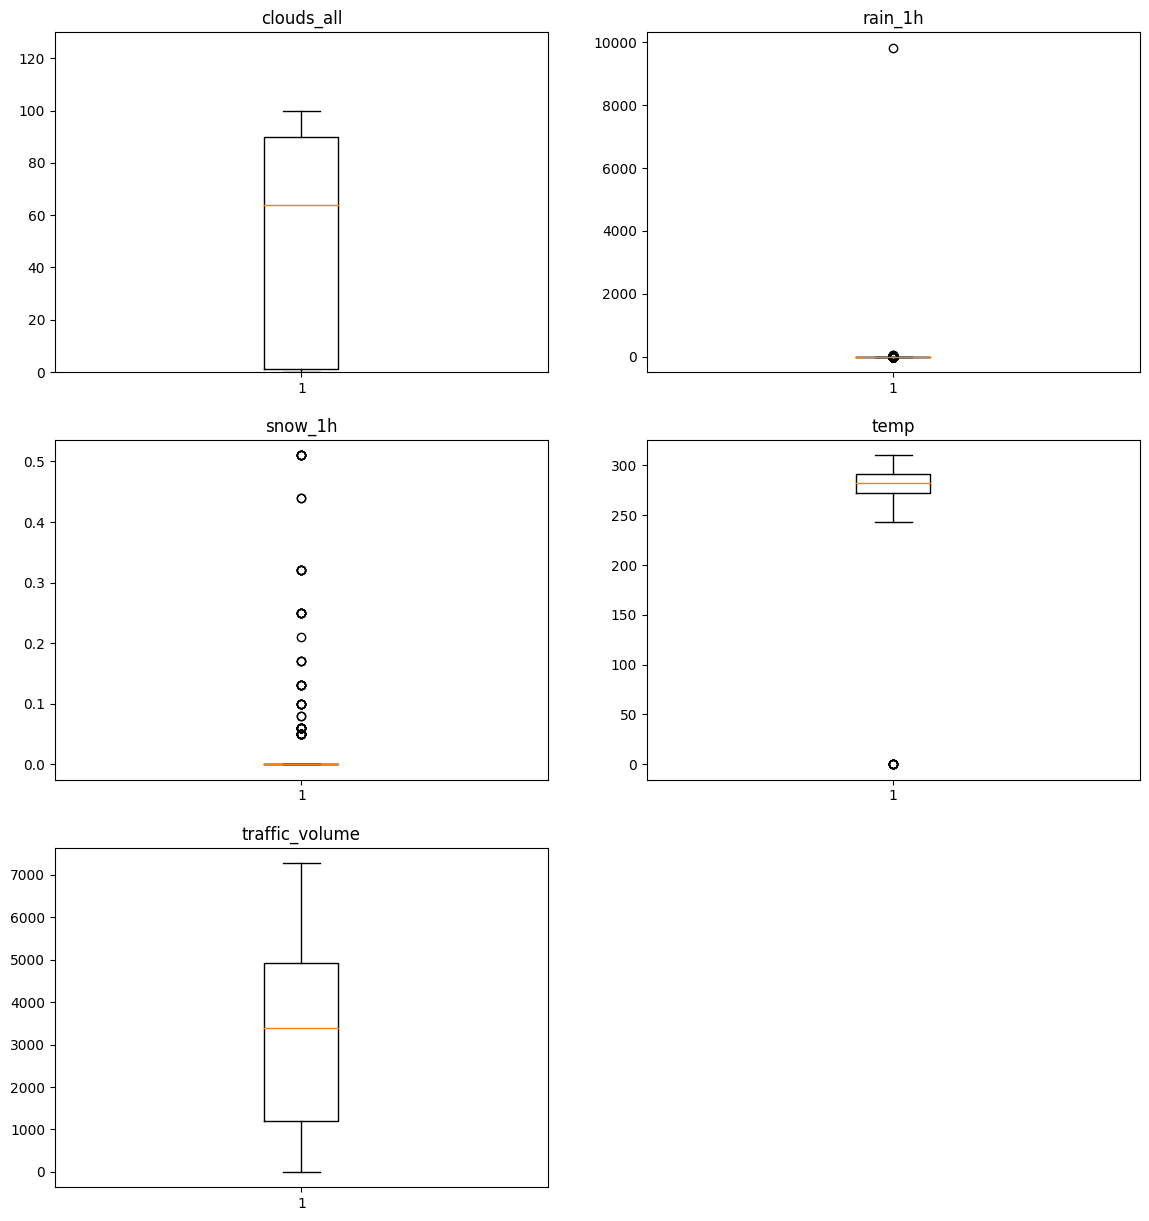

In [19]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(train_df['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(train_df['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(train_df['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(train_df['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(train_df['traffic_volume'])
plt.title('traffic_volume')

plt.show()

In [20]:
train_df = train_df[train_df['temp'] != 0]

In [21]:
train_df = train_df[train_df.rain_1h < 100]

## DATA VISUALIZATION

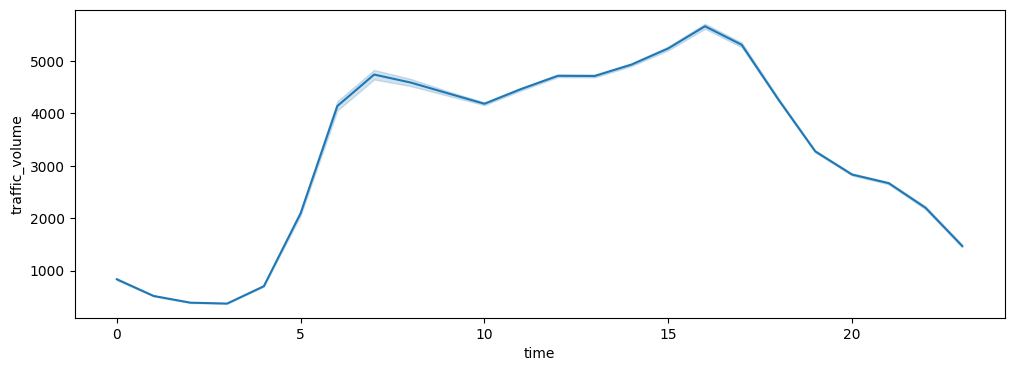

In [22]:
fig, (axis2) = plt.subplots( 1, figsize = (12,4))
sns.lineplot(x = 'time', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

This indicates that metro is busiest in between afternoon and evening

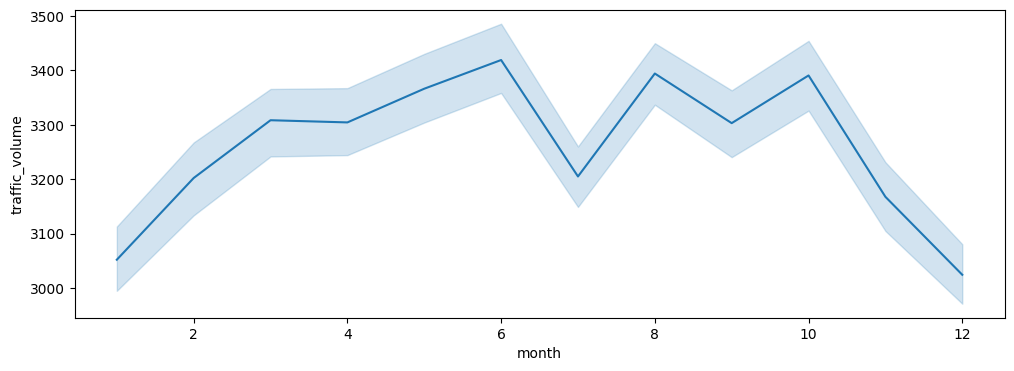

In [23]:
fig, (axis2) = plt.subplots( 1, figsize = (12,4))
sns.lineplot(x = 'month', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

June ,August,October are the busiest months

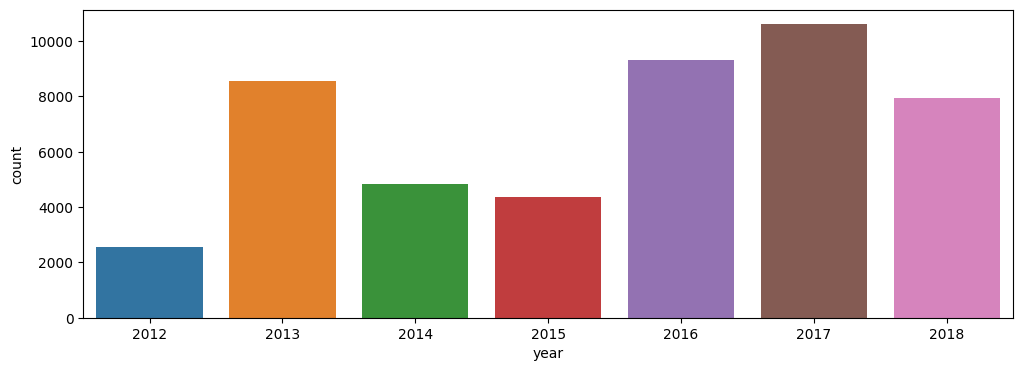

In [24]:
fig, (axis1) = plt.subplots(1,  figsize = (12,4))
sns.countplot(x = 'year', data = train_df, ax = axis1)
plt.show()

2017 turned out to be full capacitied month for us metro

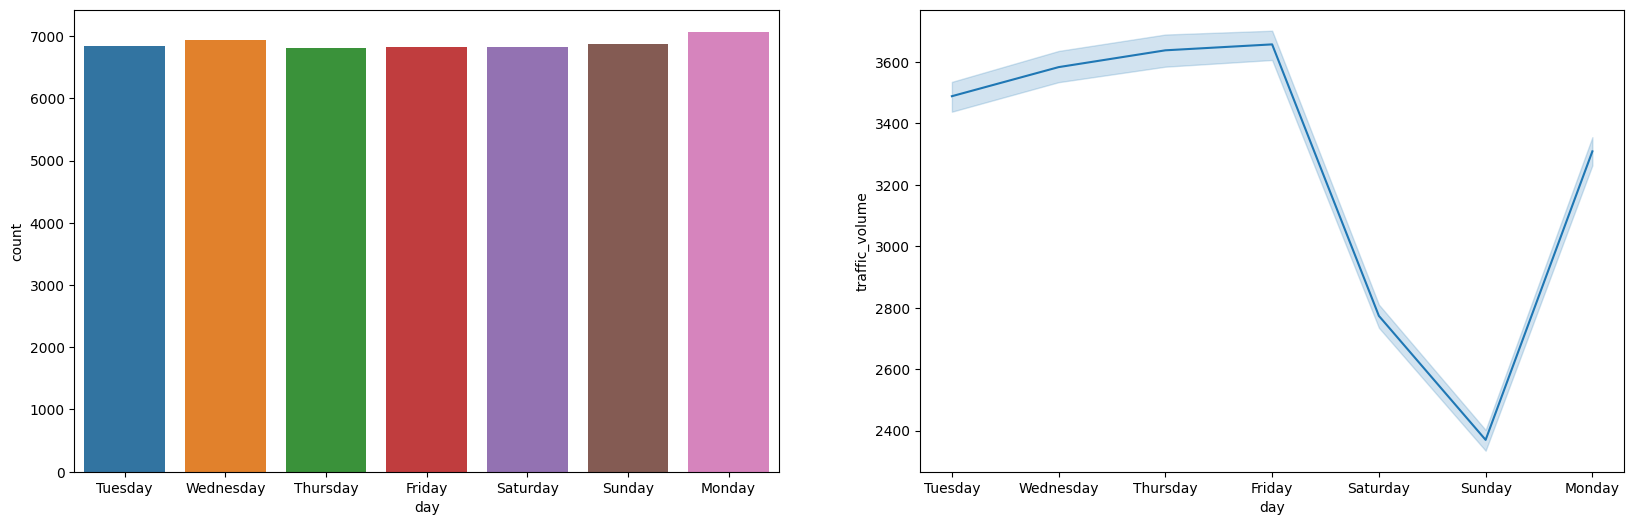

In [25]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'day', data = train_df, ax = axis1)
sns.lineplot(x = 'day', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

Metro were least used on Wednesday

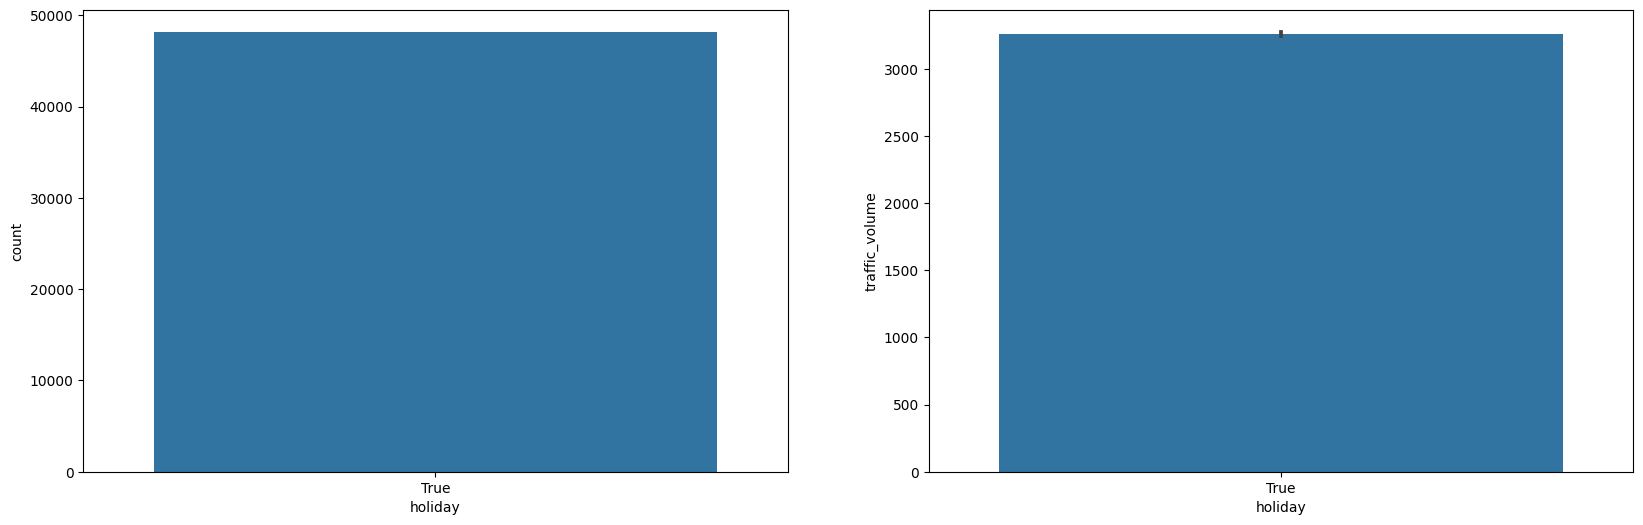

In [26]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'holiday', data = train_df, ax = axis1)
sns.barplot(x = 'holiday', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

Metros were used more on working days rather than on holidays

In [27]:
#exploring different categories in weather_main
df=pd.read_csv("D:\Metro_Interstate_Traffic_Volume.csv")
sns.countplot(y='weather_main', data=df) 
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Metro_Interstate_Traffic_Volume.csv'

It indicates that climate in us is mostly cloudy and clear

ValueError: could not convert string to float: 'Clouds'

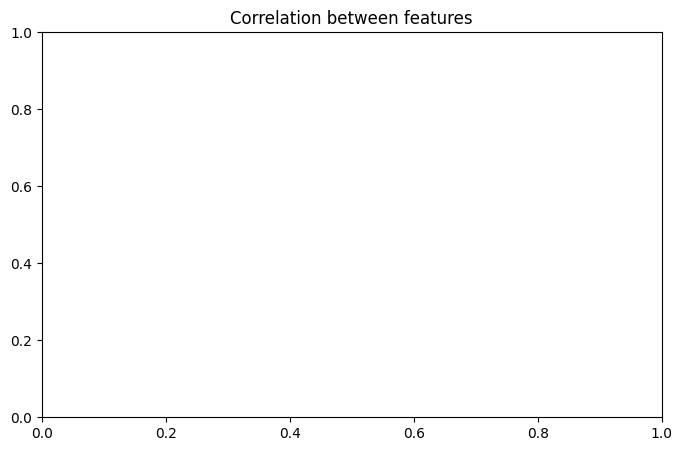

In [28]:
plt.figure(figsize=(8, 5))
plt.title('Correlation between features')
sns.heatmap(train_df.corr(), annot = True);
plt.show()

Nearly no Correlation between fields

In [29]:
train_df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'time', 'month',
       'year', 'day'],
      dtype='object')

## PRE PROCESSING

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
# drop the unrequired columns
train_df.drop(['date_time', 'weather_description'], axis = 1, inplace = True)

In [32]:
# convert values of day column to numerical format
encoder = LabelEncoder()
train_df['day'] = encoder.fit_transform(train_df['day'])

In [33]:
# subtract 242 from the temp column as there is no temperature below it
train_df['temp'] = train_df['temp'] - 242

In [34]:
# convert the values of weather_main column to numerical format
encoder = LabelEncoder()
train_df['weather_main'] = encoder.fit_transform(train_df['weather_main'])

In [35]:
train_df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'traffic_volume', 'time', 'month', 'year', 'day'],
      dtype='object')

## ML MODELS

In [ ]:
# import the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
(X, Y) = (train_df.drop(['traffic_volume'], axis = 1).values, train_df['traffic_volume'].values)

# Scale the values
scaler = StandardScaler()
X = scaler.fit_transform(X)

(X_train, X_val, Y_train, Y_val) = train_test_split(X, Y)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_val shape:" + str(X_val.shape))
print("Y_val shape:" + str(Y_val.shape))

X_train shape:(36144, 10)
Y_train shape:(36144,)
X_val shape:(12049, 10)
Y_val shape:(12049,)


In [ ]:
# DataFrame to store the RMSE scores of various algorithms
results = pd.DataFrame(columns = ['RMSE'])

In [ ]:
import math

In [ ]:
# helper function to evaluate a model
def evaluate_model(regressor, name):
    # train and test scores
    train_score = round(regressor.score(X_train, Y_train), 2)
    val_score = round(regressor.score(X_val, Y_val), 2)
    # predicted output
    Y_pred = regressor.predict(X_val)

    print(name + ' Train score: ', train_score)
    print(name + 'Test score: ', val_score)
    print('Root Mean Squared error: ', sqrt(mean_squared_error(Y_val, Y_pred)))
    print('Coefficient of determination: ', r2_score(Y_val, Y_pred))
    
    # add the current RMSE to the scores list
    results.loc[name] = sqrt(mean_squared_error(Y_val, Y_pred))
    
    # plot predicted vs true values
    x_points=np.linspace(0,8e3)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(Y_val, Y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');
    plt.show()

In [ ]:
lireg = LinearRegression()
lireg.fit(X_train, Y_train)

LinearRegression()

Linear Regression Train score:  0.15
Linear RegressionTest score:  0.13
Root Mean Squared error:  1857.2600551696764
Coefficient of determination:  0.12807637834182373


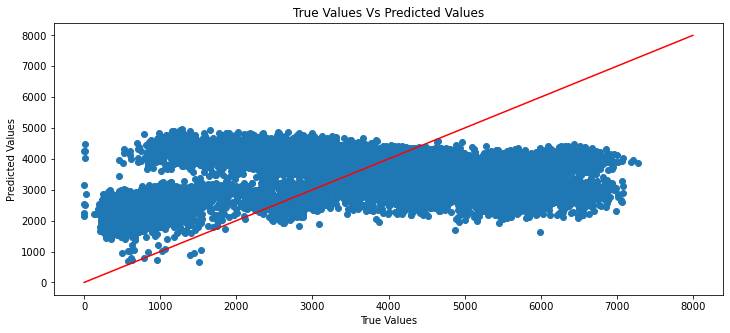

In [ ]:
# evaluate the Regressor
evaluate_model(lireg, 'Linear Regression')

In [ ]:
dtreg = DecisionTreeRegressor(max_depth = 12)
dtreg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=12)

Decision Tree Train score:  0.96
Decision TreeTest score:  0.94
Root Mean Squared error:  503.58081610327037
Coefficient of determination:  0.935898032221618


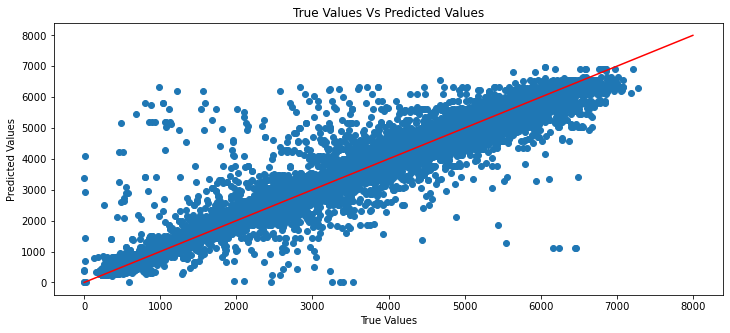

In [ ]:
# EVALUATING DECISION TREE
evaluate_model(dtreg,'Decision Tree')

In [ ]:
# n_estimators - The number of trees in the forest.
# min_samples_split - The minimum number of samples required to split an internal node
rfreg = RandomForestRegressor(n_estimators = 50, max_depth = 12, min_samples_split = 5)
rfreg.fit(X_train, Y_train)



RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=50)

Random Forest Train score:  0.97
Random ForestTest score:  0.95
Root Mean Squared error:  461.16858968041623
Coefficient of determination:  0.9462408434426076


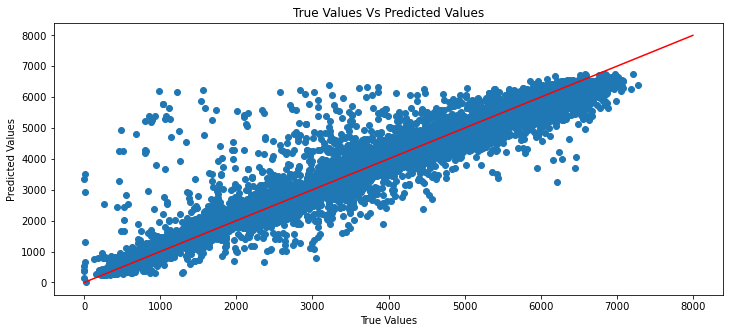

In [ ]:
# evaluate the Regressor
evaluate_model(rfreg, 'Random Forest')


In [ ]:

### Using Gradient Boosting

# n_estimators - The number of boosting stages to perform.
# max_depth - maximum depth of the individual regression estimators.
gbreg = GradientBoostingRegressor(n_estimators=500, max_depth=10)
gbreg.fit(X_train, Y_train)


GradientBoostingRegressor(max_depth=10, n_estimators=500)

Gradient Boosting Train score:  1.0
Gradient BoostingTest score:  0.96
Root Mean Squared error:  381.43000710792546
Coefficient of determination:  0.9632241500368107


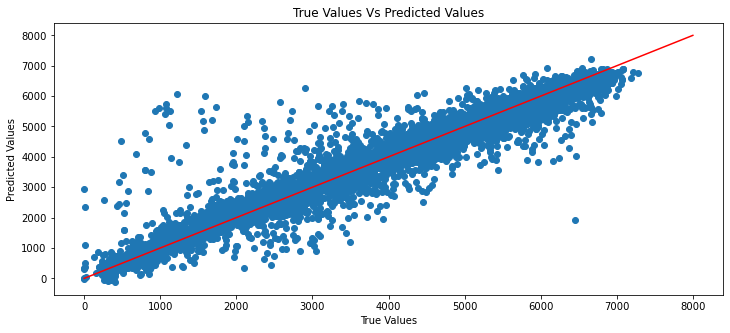

In [ ]:

# evaluate the Regressor
evaluate_model(gbreg, 'Gradient Boosting')


In [ ]:

### Using AdaBoost

# n_estimators - The number of trees in the forest.
# learning_rate - Learning rate shrinks the contribution of each classifier by learning_rate.
adareg = AdaBoostRegressor(base_estimator=dtreg, n_estimators=50, learning_rate=0.01)
adareg.fit(X_train, Y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                  learning_rate=0.01)

Ada Boost Train score:  0.97
Ada BoostTest score:  0.95
Root Mean Squared error:  462.16493505397494
Coefficient of determination:  0.9460083013802426


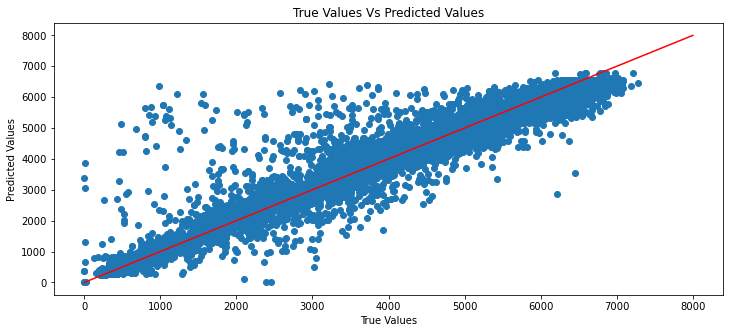

In [ ]:

# evaluate the Regressor
evaluate_model(adareg, 'Ada Boost')


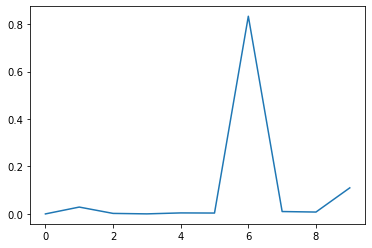

In [ ]:
plt.plot(gbreg.feature_importances_)
plt.show()

In [ ]:
#XGBOOST REGRESSOR
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xgb_model.fit(X_train, Y_train)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)

XG Boost Train score:  0.86
XG BoostTest score:  0.85
Root Mean Squared error:  772.0393033985091
Coefficient of determination:  0.8493351903267294


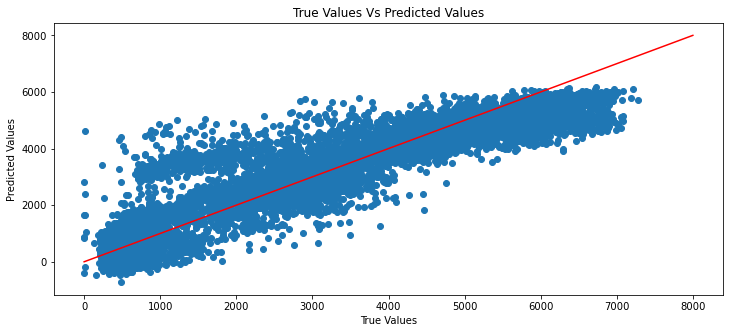

In [ ]:
# EVALUATING MODEL
evaluate_model(xgb_model, 'XG Boost')

In [ ]:
## KNN MOdel
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

KNN Train score:  0.88
KNNTest score:  0.81
Root Mean Squared error:  861.8995902347185
Coefficient of determination:  0.812221288201798


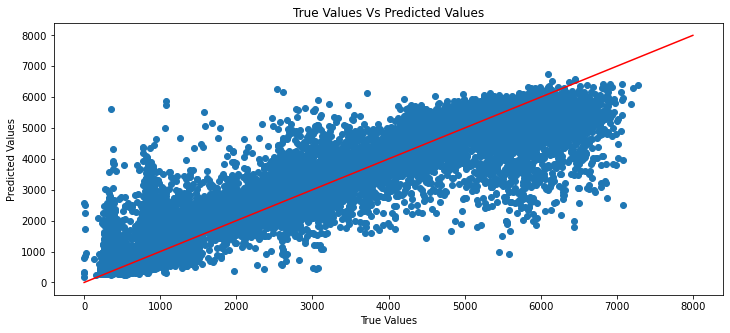

In [ ]:
#EVALUATING THE MODEL
evaluate_model(knn_model,'KNN')

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

en = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model on the training data
en.fit(X_train, Y_train)


ElasticNet(random_state=42)

Elastic Net Regression Train score:  0.13
Elastic Net RegressionTest score:  0.12
Root Mean Squared error:  1867.5698482944183
Coefficient of determination:  0.11836928059135021


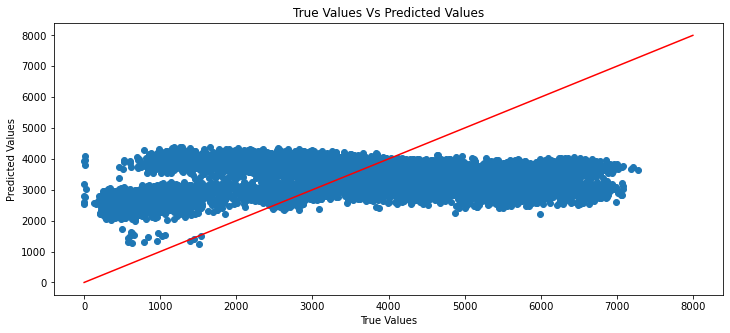

In [ ]:
evaluate_model(en,'Elastic Net Regression')

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, Y_train)

SVR(C=100, gamma=0.1)

SVR Train score:  0.69
SVRTest score:  0.68
Root Mean Squared error:  1125.2718822555075
Coefficient of determination:  0.6799278102597801


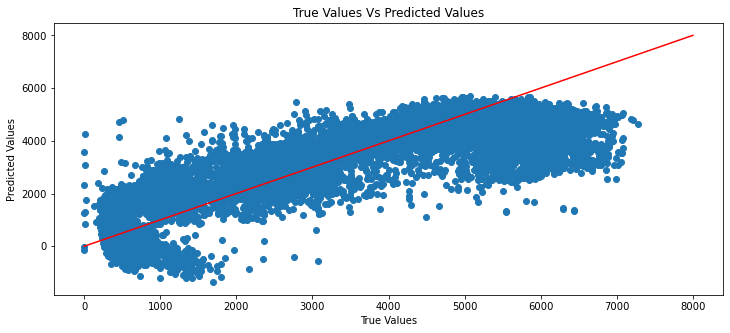

In [ ]:
#EVALUATE
evaluate_model(svr,'SVR')

In [ ]:
## Comparison between all the above algorithms
results

,RMSE
Linear Regression,1857.260055
Decision Tree,503.580816
Random Forest,461.168590
Gradient Boosting,381.430007
Ada Boost,462.164935
XG Boost,772.039303
KNN,861.899590
Elastic Net Regression,1867.569848
SVR,1125.271882


In [ ]:
train_df.to_csv('Cleaned_data.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

# Define the gradient boosting regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=3)
grid_search.fit(X_train, Y_train)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-492809.313 total time=   2.4s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-512227.853 total time=   2.5s
[CV 3/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-499392.904 total time=   2.5s
[CV 4/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-491194.642 total time=   2.4s
[CV 5/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-505312.447 total time=   2.4s
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=200;, score=-399810.541 total time=   4.6s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=200;, score=-403643.565 total time=   4.3s
[CV 3/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimato

[CV 3/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=200;, score=-282789.430 total time=   5.8s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=200;, score=-278470.471 total time=   5.7s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=200;, score=-273967.699 total time=   5.9s
[CV 1/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=300;, score=-230373.985 total time=   8.9s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=300;, score=-255500.764 total time=   9.5s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=300;, score=-257247.987 total time=   9.7s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=300;, score=-253641.982 total time=   9.5s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=300;, score=-247341.792 total time=   9.2s
[CV 1/5] END lea

[CV 5/5] END learning_rate=0.05, max_depth=5, min_samples_split=6, n_estimators=300;, score=-195933.053 total time=  11.4s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=-386555.959 total time=   2.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=-396619.307 total time=   2.3s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=-412260.231 total time=   2.3s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=-412437.452 total time=   2.4s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=-394669.260 total time=   2.5s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=-286193.277 total time=   4.7s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=-298355.799 total time=   4.6s
[CV 3/5] END learning_r

[CV 3/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=200;, score=-237923.078 total time=   5.9s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=200;, score=-249858.255 total time=   5.8s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=200;, score=-240140.795 total time=   5.9s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=300;, score=-200795.649 total time=   8.9s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=300;, score=-219443.290 total time=   8.9s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=300;, score=-214260.729 total time=   9.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=300;, score=-222833.571 total time=   8.9s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_samples_split=4, n_estimators=300;, score=-220813.119 total time=   8.8s
[CV 1/5] END learning_ra

[CV 1/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=100;, score=-328962.093 total time=   2.2s
[CV 2/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=100;, score=-315808.739 total time=   2.2s
[CV 3/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=100;, score=-329033.860 total time=   2.2s
[CV 4/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=100;, score=-324708.630 total time=   2.2s
[CV 5/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=100;, score=-326384.563 total time=   2.2s
[CV 1/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=200;, score=-242546.092 total time=   4.5s
[CV 2/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=200;, score=-256127.147 total time=   4.5s
[CV 3/5] END learning_rate=0.15, max_depth=3, min_samples_split=2, n_estimators=200;, score=-277295.136 total time=   4.4s
[CV 4/5] END lea

[CV 3/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200;, score=-214216.373 total time=   5.9s
[CV 4/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200;, score=-220913.455 total time=   6.0s
[CV 5/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=200;, score=-214098.087 total time=   5.8s
[CV 1/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=300;, score=-187828.914 total time=   8.9s
[CV 2/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=300;, score=-205006.954 total time=   8.8s
[CV 3/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=300;, score=-205299.768 total time=   8.9s
[CV 4/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=300;, score=-206552.549 total time=   8.8s
[CV 5/5] END learning_rate=0.15, max_depth=4, min_samples_split=4, n_estimators=300;, score=-205959.455 total time=   8.9s
[CV 1/5] END lea

[CV 5/5] END learning_rate=0.15, max_depth=5, min_samples_split=6, n_estimators=300;, score=-179436.791 total time=  10.8s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 4, 5], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Predict on the test set
predictions = grid_search.predict(X_val)

# Compute evaluation metrics
mse = mean_squared_error(Y_val, predictions)
rmse = np.sqrt(mse)

# Print the best parameters and evaluation metrics for the grid search
print("Grid Search Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Negative Mean Squared Error: {-grid_search.best_score_:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")

Grid Search Results:
Best Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300}
Best Negative Mean Squared Error: 179964.99
RMSE on Test Set: 429.15


In [ ]:
results

,RMSE
Linear Regression,1857.260055
Decision Tree,503.580816
Random Forest,461.168590
Gradient Boosting,381.430007
Ada Boost,462.164935
XG Boost,772.039303
KNN,861.899590
Elastic Net Regression,1867.569848
SVR,1125.271882


### Time Series

Importing Libraries


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
from datetime import date
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import gc

import warnings
warnings.filterwarnings('ignore')

**Importing Data**

In [3]:
data = pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv", infer_datetime_format=True) 

In [4]:
data['date_time'] =  pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')

In [5]:
data.describe(include = 'all')


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-02 09:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-30 23:00:00,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000


In [6]:
data = data.set_index(pd.DatetimeIndex(data['date_time'])).rename(columns={"date_time": "ds"}).drop_duplicates(subset=['ds'])

In [7]:
ts = data['2018-08-30':'2018-09-29']

In [8]:
ts.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ds,traffic_volume
date_time,,,,,,,,,
2018-08-30 00:00:00,None,286.24,0.25,0.0,1,Rain,light rain,2018-08-30 00:00:00,670
2018-08-30 01:00:00,None,285.53,0.25,0.0,1,Rain,light rain,2018-08-30 01:00:00,456
2018-08-30 02:00:00,None,285.35,0.25,0.0,1,Rain,light rain,2018-08-30 02:00:00,326
2018-08-30 03:00:00,None,285.33,0.25,0.0,1,Rain,light rain,2018-08-30 03:00:00,388
2018-08-30 04:00:00,None,285.49,0.25,0.0,1,Rain,light rain,2018-08-30 04:00:00,1008


In [9]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2018-08-30 00:00:00 to 2018-09-29 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              744 non-null    object        
 1   temp                 744 non-null    float64       
 2   rain_1h              744 non-null    float64       
 3   snow_1h              744 non-null    float64       
 4   clouds_all           744 non-null    int64         
 5   weather_main         744 non-null    object        
 6   weather_description  744 non-null    object        
 7   ds                   744 non-null    datetime64[ns]
 8   traffic_volume       744 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 58.1+ KB


**Train/Test Split**

In [10]:
split_date = '2018-09-22'
ts_train = ts.loc[ts.index <= split_date].copy()
ts_test = ts.loc[ts.index > split_date].copy()

In [11]:
len(ts_train), len(ts_test)

(553, 191)

### Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
window = 24*7
cutoff = 0.05
def test_stationarity(timeseries, window = window, cutoff = cutoff):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(30, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 24 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

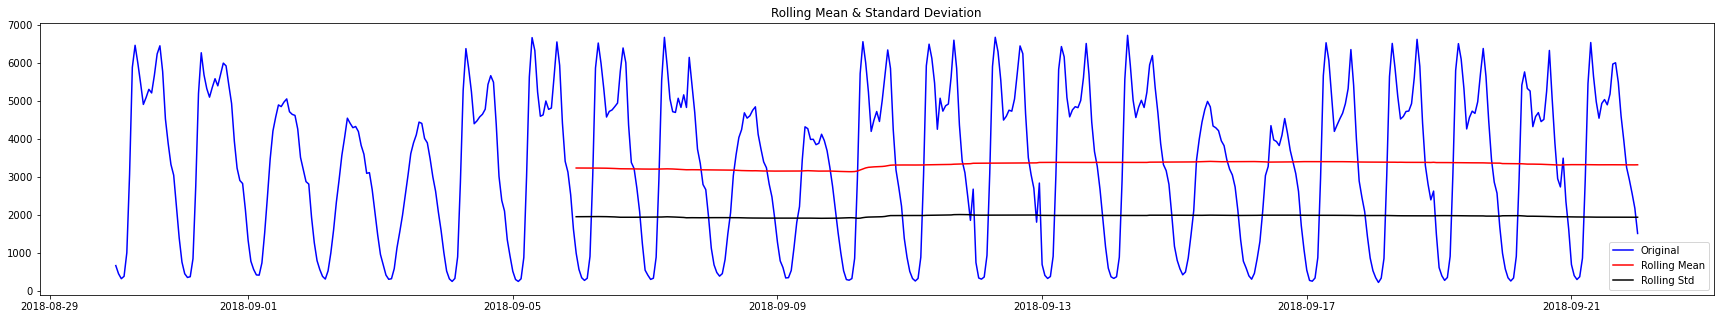

Results of Dickey-Fuller Test:
p-value = 0.0698. The series is likely non-stationary.
Test Statistic                  -2.725073
p-value                          0.069799
#Lags Used                      24.000000
Number of Observations Used    528.000000
Critical Value (1%)             -3.442796
Critical Value (5%)             -2.867030
Critical Value (10%)            -2.569694
dtype: float64


In [ ]:
test_stationarity(ts_train.traffic_volume)

### Building a model

In [ ]:
# ACF and PACF plots
lag = 24
lag_pacf = pacf(ts_train.traffic_volume, nlags=lag, method='ols')
lag_acf = acf(ts_train.traffic_volume, nlags=lag)

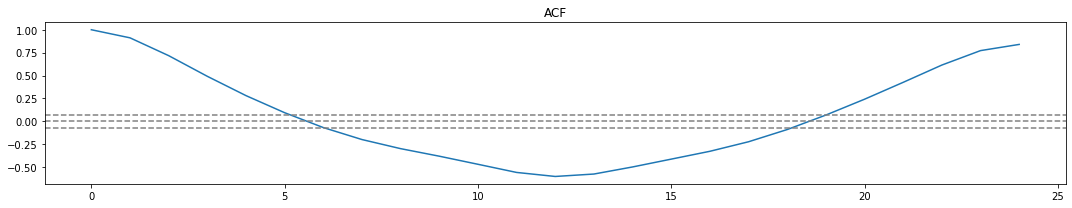

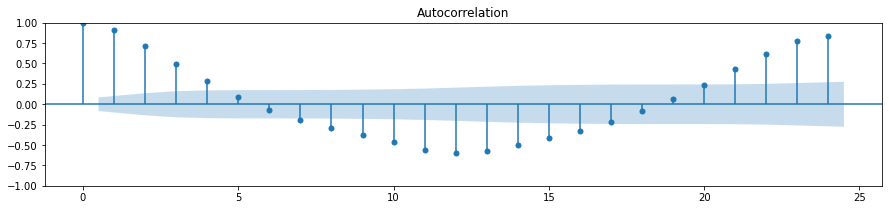

In [ ]:
#Plot ACF: 
plt.figure(figsize=(15,3))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('ACF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_acf(ts_train.traffic_volume, ax=plt.gca(),lags=lag)
plt.show()

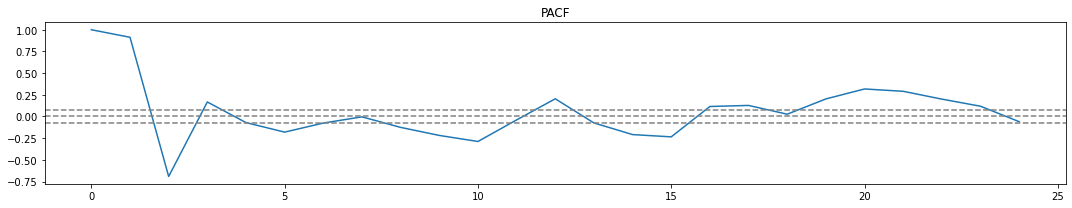

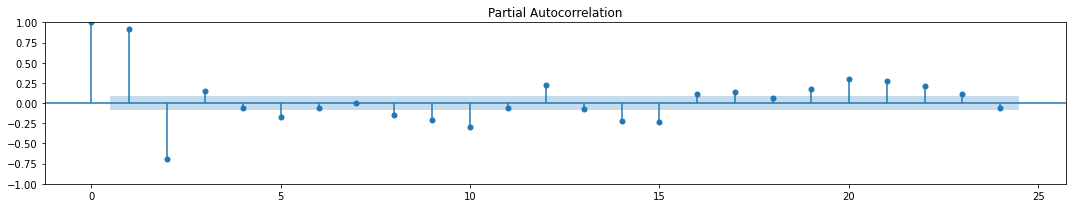

In [ ]:
#Plot PACF:
plt.figure(figsize=(15,3))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('PACF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_pacf(ts_train.traffic_volume, ax=plt.gca(), lags=lag)
plt.tight_layout()
plt.show()

In [ ]:
p=2
d=0
q=1


### ARIMA Model

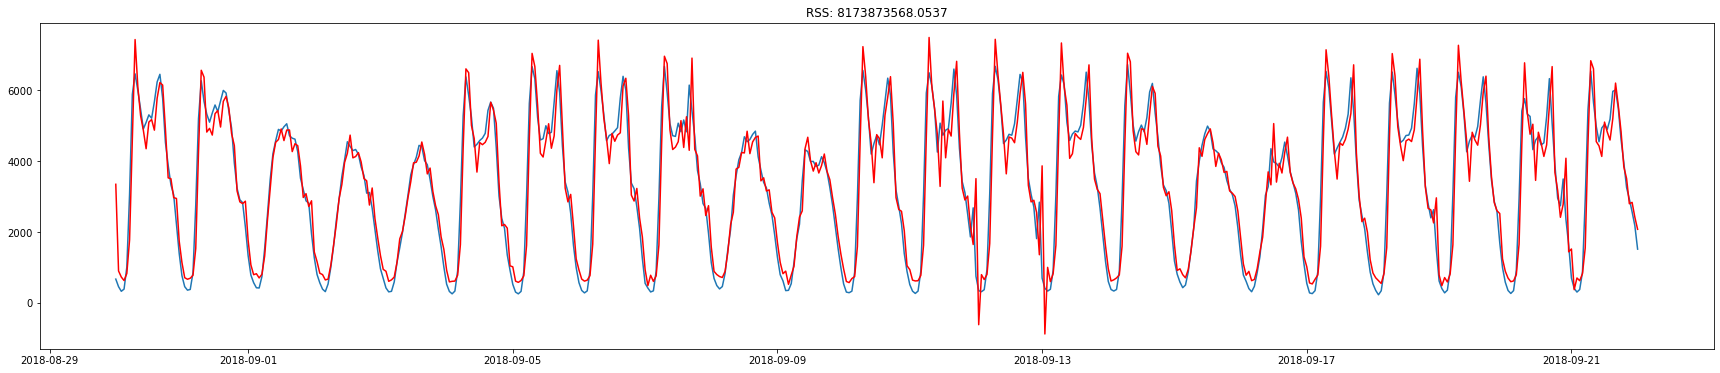

CPU times: total: 125 ms
Wall time: 313 ms


In [ ]:
%%time
# ARIMA
model = ARIMA(ts_train.traffic_volume, order=(p, d, q))  
#model = ARIMA(ts_train, order=(1, 0, 1)) 
results_ARIMA = model.fit()
plt.figure(figsize=(30,6))
plt.plot(ts_train.traffic_volume)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues).dropna()**2))
plt.show() 

In [ ]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         traffic_volume   No. Observations:                  553
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -4294.084
Date:                Sun, 28 May 2023   AIC                           8598.169
Time:                        05:21:56   BIC                           8619.746
Sample:                    08-30-2018   HQIC                          8606.599
                         - 09-22-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3346.8915    211.892     15.795      0.000    2931.590    3762.193
ar.L1          1.4305      0.049     29.370      0.000       1.335       1.526
ar.L2         -0.5860      0.048    -12.233      0.000      -0.680      -0.492
ma.L1          0.2318      0.058      3.978      0.000       0.118       0.346
sigma2      3.243e+05   1.48e+04     21.870      0.000    2.95e+05    3.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               194.70
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

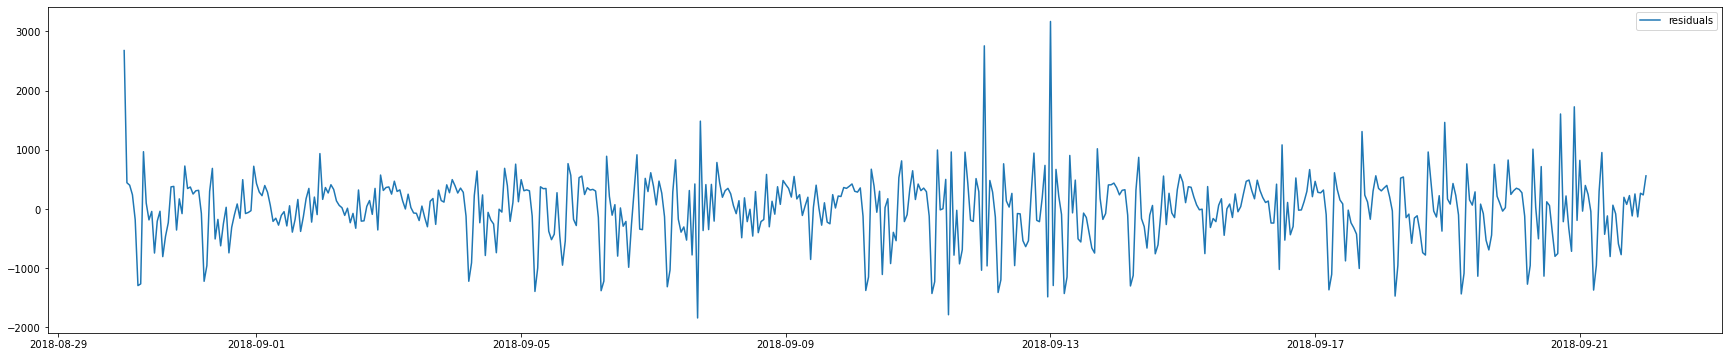

In [ ]:
x = pd.DataFrame(results_ARIMA.fittedvalues)
x.columns = ['traffic_volume']
x = x.traffic_volume - ts_train.traffic_volume
plt.figure(figsize=(30,6))
plt.plot(x, label='residuals')
plt.legend(loc='best')
plt.show()

### Testing ARIMA on test set

In [ ]:
def StartARIMAForecasting(Actual, p, d, q):
    model = ARIMA(Actual, order=(p, d, q))
    model_fit = model.fit()
    prediction = model_fit.forecast()[0]
    return prediction

In [ ]:
len(ts_test.traffic_volume)

191

In [ ]:
%%time
#new arrays to store actual and predictions
Actual = [x for x in ts_train.traffic_volume]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(ts_test.traffic_volume)):
    ActualValue =  ts_test.traffic_volume[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, p,d,q)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)  
 
predictions=pd.DataFrame(Predictions).set_index(ts_test.index)

Actual=1273.000000, Predicted=1282.372896
Actual=1207.000000, Predicted=1450.499736
Actual=611.000000, Predicted=1443.204571
Actual=647.000000, Predicted=489.347031
Actual=960.000000, Predicted=1118.963535
Actual=1635.000000, Predicted=1471.329721
Actual=2445.000000, Predicted=2328.668300
Actual=3415.000000, Predicted=3081.892807
Actual=3770.000000, Predicted=4046.719972
Actual=4308.000000, Predicted=3845.121492
Actual=4638.000000, Predicted=4577.674490
Actual=4831.000000, Predicted=4642.909437
Actual=4565.000000, Predicted=4755.404154
Actual=4654.000000, Predicted=4174.346288
Actual=4589.000000, Predicted=4611.845541
Actual=4582.000000, Predicted=4352.281954
Actual=4847.000000, Predicted=4438.450094
Actual=4620.000000, Predicted=4864.102060
Actual=4347.000000, Predicted=4234.431775
Actual=3602.000000, Predicted=4058.043502
Actual=2985.000000, Predicted=3020.844720
Actual=2480.000000, Predicted=2669.234939
Actual=1871.000000, Predicted=2272.734624
Actual=1249.000000, Predicted=1647.310

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def error_metrics(y_true, y_pred):
    print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_true, y_pred)))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print('Mean Absolute percentage Error: {:.2f} %'.format(mean_absolute_percentage_error(y_true, y_pred[0])))

In [ ]:
#Calculate Model error
error_metrics(ts_test.traffic_volume, predictions)

Mean Absolute Error: 394.42
Root Mean Squared Error: 542.70
Mean Absolute percentage Error: 23.69 %


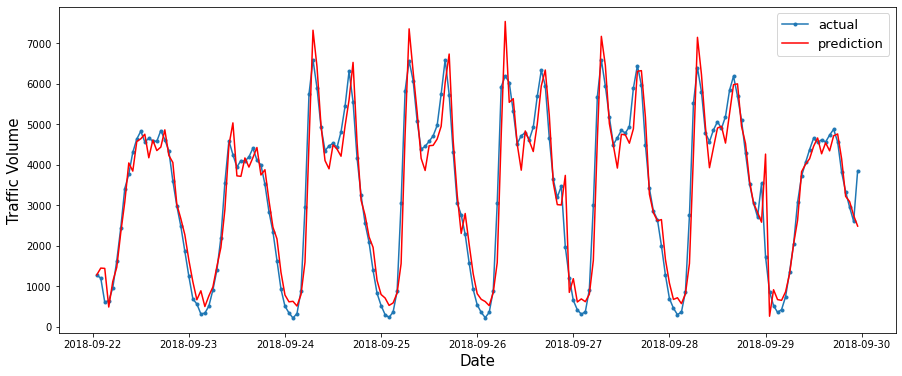

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(ts_test.index, ts_test.traffic_volume, marker='.', label="actual")
plt.plot(ts_test.index, Predictions, 'r', label="prediction")
plt.ylabel('Traffic Volume', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()

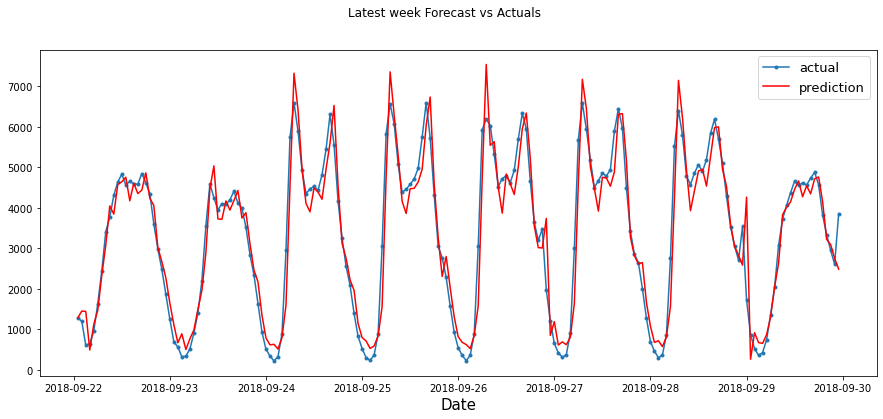

In [ ]:
# zoom on lastest 2 days
plt.figure(figsize=(15, 6))
plt.plot(ts_test.index, ts_test.traffic_volume, marker='.', label="actual")
plt.plot(ts_test.index, Predictions, 'r', label="prediction")
ax.set_xbound(lower=datetime.date(2018, 9, 27), upper=datetime.date(2018, 9, 29))
plt.legend(fontsize=13)
plt.xlabel('Date', size=15)
ax.set_ylim(0, 8000)
plot = plt.suptitle('Latest week Forecast vs Actuals')
plt.show()

### Auto ARIMA 

In [ ]:
%%time
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(ts_train.traffic_volume, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3,  # maximum p and q
                      max_P=3, max_Q=3,  # maximum p and q
                      m=24,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,
                     n_fits = 50)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=9963.607, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=8959.811, Time=1.75 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=10712.009, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=9345.111, Time=0.28 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=5.35 sec
 ARIMA(0,0,1)(0,0,2)[24] intercept   : AIC=8837.609, Time=7.52 sec
 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=8824.436, Time=9.08 sec
 ARIMA(0,0,1)(2,0,2)[24] intercept   : AIC=inf, Time=13.56 sec
 ARIMA(0,0,1)(1,0,3)[24] intercept   : AIC=8775.105, Time=21.36 sec
 ARIMA(0,0,1)(0,0,3)[24] intercept   : AIC=8782.450, Time=12.47 sec
 ARIMA(0,0,1)(2,0,3)[24] intercept   : AIC=inf, Time=20.65 sec
 ARIMA(0,0,0)(1,0,3)[24] intercept   : AIC=inf, Time=16.28 sec
 ARIMA(1,0,1)(1,0,3)[24] intercept   : AIC=

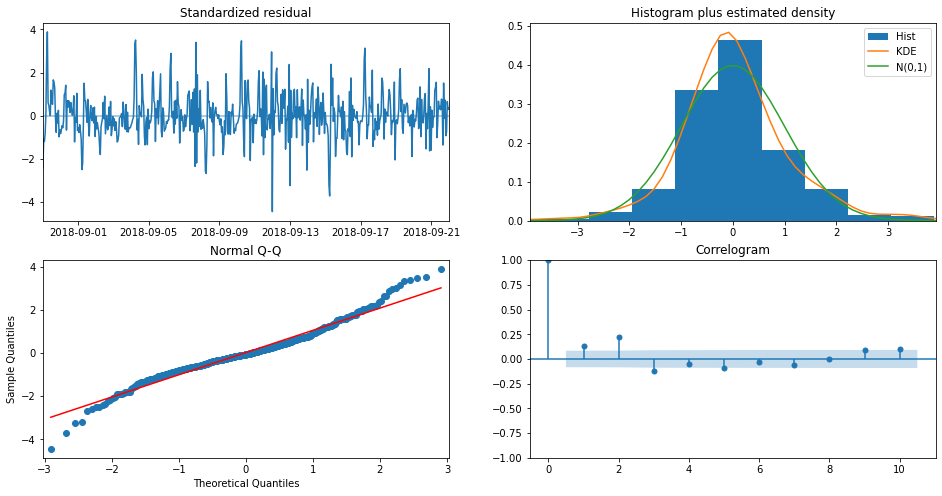

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
y_pred = model.predict(len(ts_test))

In [ ]:
y_pred

2018-09-22 01:00:00    1273.058894
2018-09-22 02:00:00    1102.059132
2018-09-22 03:00:00    1089.327646
2018-09-22 04:00:00    1447.941193
2018-09-22 05:00:00    3049.554226
                          ...     
2018-09-29 19:00:00    3384.343197
2018-09-29 20:00:00    3141.506378
2018-09-29 21:00:00    3069.063013
2018-09-29 22:00:00    2788.175579
2018-09-29 23:00:00    2514.237865
Freq: H, Length: 191, dtype: float64

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(ts_test.traffic_volume, y_pred))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(ts_test.traffic_volume, y_pred)))
print('Test Mean Absolute percentage Error:',mean_absolute_percentage_error(ts_test.traffic_volume, y_pred))

Test Mean Absolute Error: 895.3044822557329
Test Root Mean Squared Error: 1126.7254715640288
Test Mean Absolute percentage Error: 79.97243191238867


In [ ]:
%%time
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(ts_train.traffic_volume,order=(p,d,q),seasonal_order=(p,d,q, 24))
results=model.fit()

CPU times: total: 54.5 s
Wall time: 14.3 s


In [ ]:
y_pred = pd.DataFrame(results.predict(len(ts_test)))

In [ ]:
y_pred

,predicted_mean
2018-09-06 23:00:00,1547.714736
2018-09-07 00:00:00,658.137643
2018-09-07 01:00:00,218.851388
2018-09-07 02:00:00,402.227440
2018-09-07 03:00:00,285.495141
...,...
2018-09-21 20:00:00,3668.781062
2018-09-21 21:00:00,3104.047332
2018-09-21 22:00:00,1951.227381
2018-09-21 23:00:00,2233.966656


In [ ]:
len(ts_train), len(ts_test)

(553, 191)

### Feature Importance using PyCaret

In [ ]:
import pandas as pd

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('/content/Cleaned_data.csv')

In [ ]:
from pycaret.regression import *


In [ ]:
df.head()

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,time,month,year,day
0,0,False,46.28,0.0,0.0,40,1,5545,9,10,2012,5
1,1,False,47.36,0.0,0.0,75,1,4516,10,10,2012,5
2,2,False,47.58,0.0,0.0,90,1,4767,11,10,2012,5
3,3,False,48.13,0.0,0.0,90,1,5026,12,10,2012,5
4,4,False,49.14,0.0,0.0,75,1,4918,13,10,2012,5


,Description,Value
0,Session id,6174
1,Target,traffic_volume
2,Target type,Regression
3,Original data shape,"(48193, 12)"
4,Transformed data shape,"(48193, 12)"
5,Transformed train set shape,"(33735, 12)"
6,Transformed test set shape,"(14458, 12)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,205.7317,114812.4943,338.5435,0.9709,0.2659,0.5187,3.3650
lightgbm,Light Gradient Boosting Machine,240.1520,162810.7216,403.1567,0.9587,0.2688,0.6519,0.5610
rf,Random Forest Regressor,219.9816,169034.4552,410.7160,0.9571,0.2441,0.6356,13.5440
et,Extra Trees Regressor,236.6804,199600.3153,446.4158,0.9493,0.2508,0.7091,9.1000
dt,Decision Tree Regressor,271.0565,314501.7153,560.3886,0.9202,0.3389,0.5149,0.2550
gbr,Gradient Boosting Regressor,427.4636,392298.0141,626.1040,0.9005,0.4505,1.0719,3.5770
ada,AdaBoost Regressor,674.8878,802207.3181,895.2038,0.7965,0.4197,1.1058,1.2980
knn,K Neighbors Regressor,1221.0380,2647111.4466,1626.7257,0.3285,0.8340,1.6411,0.1400
lar,Least Angle Regression,1621.9039,3380229.9571,1838.4575,0.1423,0.9163,2.6817,0.0800
ridge,Ridge Regression,1623.5094,3379877.6349,1838.3628,0.1423,0.9191,2.6899,0.0960


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

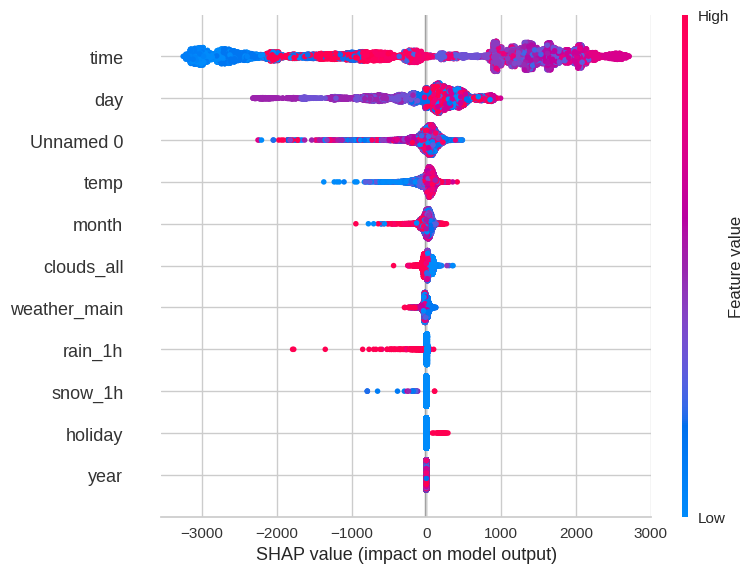

AttributeError: ignored

In [ ]:
regression_setup = setup(data=df, target='traffic_volume')
best_models = compare_models(n_select=5)

# Iterate over the best models and retrieve feature importance
for model in best_models:
    model_name = model.__class__.__name__
    trained_model = interpret_model(model)
    
    # Retrieve feature importance
    feature_importance = trained_model.feature_importance_
    print(f"Feature Importance for {model_name}: {feature_importance}")

In [ ]:
from pycaret.regression import *
regression_setup = setup(data=df, target='traffic_volume', verbose=False)
best_models = compare_models(n_select=5)

# Iterate over the best models and retrieve feature importance
for model in best_models:
    model_name = model.__class__.__name__
    trained_model = create_model(model)
    
    # Retrieve feature importance
    feature_importance = trained_model.feature_importances_
    print(f"Feature Importance for {model_name}: {feature_importance}")
    # Get the feature names
    feature_names = df.drop('traffic_volume', axis=1).columns
    
    # Create a dictionary of feature importance with feature names
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    
    print(f"Feature Importance for {model_name}:")
    for feature, importance in feature_importance_dict.items():
        print(f"{feature}: {importance}")
        print()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,207.0935,116485.2186,341.0388,0.9705,0.2477,0.4396,3.3700
lightgbm,Light Gradient Boosting Machine,240.8192,165179.6665,406.1673,0.9582,0.2581,0.5731,0.5450
rf,Random Forest Regressor,220.3361,172236.4161,414.5334,0.9564,0.2312,0.5385,13.9690
et,Extra Trees Regressor,236.8414,205689.3646,453.2767,0.9479,0.2390,0.5911,8.7720
dt,Decision Tree Regressor,273.1674,331225.7556,575.2395,0.9161,0.2988,0.4067,0.2770
gbr,Gradient Boosting Regressor,429.9088,397923.7431,630.7774,0.8993,0.4513,0.9041,3.5540
ada,AdaBoost Regressor,654.9178,763745.2935,873.7784,0.8067,0.4106,1.0413,1.0830
knn,K Neighbors Regressor,1218.1830,2643681.2632,1625.7463,0.3310,0.8308,1.6356,0.1640
ridge,Ridge Regression,1625.2266,3388569.0572,1840.7781,0.1423,0.9154,2.4549,0.0890
lr,Linear Regression,1625.2429,3388684.2644,1840.8094,0.1423,0.9154,2.4550,0.3320


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,206.6312,119339.1664,345.4550,0.9704,0.2559,0.2565
1,201.9934,114597.4582,338.5225,0.9710,0.2142,0.4151
2,208.7813,109914.5472,331.5336,0.9720,0.2010,0.2908
3,200.3923,102337.6400,319.9025,0.9743,0.2672,0.2792
4,208.7248,123093.5354,350.8469,0.9675,0.2218,0.1616
5,215.9777,136128.8578,368.9564,0.9651,0.2029,0.1235
6,212.4863,124362.9600,352.6513,0.9689,0.2608,0.4507
7,205.0163,108741.2846,329.7594,0.9728,0.2712,0.2345
8,204.7212,110408.1988,332.2773,0.9725,0.3137,1.6263


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Feature Importance for XGBRegressor: [0.01010977 0.00149514 0.00798    0.00976699 0.00166646 0.00479393
 0.01295355 0.7561428  0.01180137 0.         0.18328995]
Feature Importance for XGBRegressor:
Unnamed: 0: 0.010109773837029934

holiday: 0.0014951439807191491

temp: 0.007980001159012318

rain_1h: 0.00976699311286211

snow_1h: 0.0016664575086906552

clouds_all: 0.004793926142156124

weather_main: 0.012953552417457104

time: 0.756142795085907

month: 0.011801370419561863

year: 0.0

day: 0.18328994512557983



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,239.9079,165890.0300,407.2960,0.9588,0.2550,0.4471
1,234.0692,161530.0086,401.9080,0.9592,0.2596,0.5455
2,241.5062,153516.1482,391.8114,0.9609,0.2231,0.4075
3,235.2030,154920.8745,393.5999,0.9611,0.2626,0.5258
4,247.0360,179558.0014,423.7428,0.9526,0.2523,0.2369
5,252.3283,194271.6336,440.7626,0.9502,0.2285,0.1547
6,241.8258,165697.9880,407.0602,0.9585,0.2558,0.4989
7,238.4756,156590.0199,395.7146,0.9609,0.2522,0.2559
8,238.0188,159649.4837,399.5616,0.9602,0.3209,1.8912


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Feature Importance for LGBMRegressor: [754   9 406  66   4  83  74 770 223   3 608]
Feature Importance for LGBMRegressor:
Unnamed: 0: 754

holiday: 9

temp: 406

rain_1h: 66

snow_1h: 4

clouds_all: 83

weather_main: 74

time: 770

month: 223

year: 3

day: 608



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,215.1268,170950.9362,413.4621,0.9576,0.2349,0.3503
1,223.1008,185581.3270,430.7915,0.9531,0.2204,0.5413
2,221.7849,162081.8158,402.5939,0.9587,0.1869,0.2051
3,214.8195,161100.1840,401.3729,0.9596,0.2322,0.5164
4,228.0396,189614.1089,435.4470,0.9500,0.2202,0.1761
5,227.7917,198502.5226,445.5362,0.9491,0.1928,0.1241
6,219.7917,174253.6546,417.4370,0.9564,0.2372,0.4143
7,217.0596,148554.2631,385.4274,0.9629,0.2245,0.2339
8,210.5353,147454.1016,383.9975,0.9633,0.3044,2.0963


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Feature Importance for RandomForestRegressor: [2.05199058e-02 2.60182129e-05 2.33726862e-02 2.21619387e-03
 1.10132317e-04 4.22689644e-03 3.89805005e-03 8.28034792e-01
 7.94401106e-03 2.21302333e-03 1.07438291e-01]
Feature Importance for RandomForestRegressor:
Unnamed: 0: 0.02051990578456014

holiday: 2.6018212895701242e-05

temp: 0.02337268616251437

rain_1h: 0.0022161938720214667

snow_1h: 0.00011013231712323352

clouds_all: 0.004226896437454074

weather_main: 0.00389805004860942

time: 0.8280347920459797

month: 0.007944011060753861

year: 0.002213023332468731

day: 0.10743829072561926



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,232.8074,202954.9760,450.5052,0.9496,0.2415,0.4002
1,236.4259,216960.9111,465.7906,0.9452,0.2276,0.7245
2,239.2533,197157.6631,444.0244,0.9497,0.2026,0.2231
3,232.5967,198944.1535,446.0316,0.9501,0.2375,0.4941
4,237.4703,211913.1714,460.3403,0.9441,0.2341,0.2632
5,247.1737,240932.3421,490.8486,0.9383,0.2002,0.1267
6,236.6846,202664.4725,450.1827,0.9493,0.2447,0.5833
7,235.4343,192207.0259,438.4142,0.9520,0.2395,0.2591
8,232.9968,190200.5387,436.1199,0.9526,0.3068,2.1460


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Feature Importance for ExtraTreesRegressor: [1.22727590e-02 2.57263595e-05 1.85592341e-02 2.76961840e-03
 1.56289655e-04 7.27311955e-03 6.21336255e-03 7.97360723e-01
 1.20072393e-02 6.89321166e-03 1.36468717e-01]
Feature Importance for ExtraTreesRegressor:
Unnamed: 0: 0.01227275898115524

holiday: 2.5726359544754033e-05

temp: 0.018559234095135366

rain_1h: 0.002769618395822759

snow_1h: 0.00015628965463555602

clouds_all: 0.007273119551708702

weather_main: 0.006213362554456596

time: 0.7973607226072543

month: 0.012007239317686134

year: 0.006893211655986715

day: 0.1364687168266139



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,260.8056,289224.3859,537.7959,0.9282,0.3161,0.2286
1,281.5062,369377.7232,607.7645,0.9066,0.2816,0.1437
2,280.1651,337269.1467,580.7488,0.9140,0.2503,0.1112
3,270.6432,336821.6568,580.3634,0.9155,0.3287,0.2035
4,276.1844,336464.1755,580.0553,0.9112,0.2713,0.1841
5,279.7332,346882.5212,588.9673,0.9111,0.2355,0.1231
6,279.2633,338369.5378,581.6954,0.9153,0.3086,0.1939
7,267.2772,312780.7868,559.2681,0.9218,0.3018,0.1431
8,265.2143,313759.7403,560.1426,0.9218,0.3674,2.1146


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Feature Importance for DecisionTreeRegressor: [2.30628590e-02 2.48696294e-05 2.27576621e-02 2.50693455e-03
 1.60095396e-04 4.06926912e-03 3.05526929e-03 8.27260464e-01
 7.52843128e-03 2.11531435e-03 1.07458831e-01]
Feature Importance for DecisionTreeRegressor:
Unnamed: 0: 0.023062859025318783

holiday: 2.4869629398237395e-05

temp: 0.02275766208924774

rain_1h: 0.002506934548813607

snow_1h: 0.00016009539588675384

clouds_all: 0.0040692691213887605

weather_main: 0.0030552692947111606

time: 0.8272604638333173

month: 0.007528431275402567

year: 0.002115314353106185

day: 0.10745883143340886

